In [8]:
pip install tensorflow keras sklearn matplotlib pandas Pillow

Note: you may need to restart the kernel to use updated packages.


In [11]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

import pathlib
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, array_to_img, load_img
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

import matplotlib.image as mpimg
from tensorflow.keras.layers import Conv2D , MaxPool2D , Flatten
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential


### Explore the dataset

In [3]:
#The PIL library is used to open image content into an array.
#we have stored all the images and their labels into lists (data and labels).

In [17]:
data = []
labels = []
classes = 43
cur_path = os.getcwd()
#Retrieving the images and their labels 
for i in range(classes):
    path = os.path.join(cur_path,'train',str(i))
    images = os.listdir(path)
    for a in images:
        try:
            image = Image.open(path + '\\'+ a)
            image = image.resize((64,64))
            image = np.array(image)
            #sim = Image.fromarray(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")
#Converting lists into numpy arrays
data = np.array(data)
labels = np.array(labels)

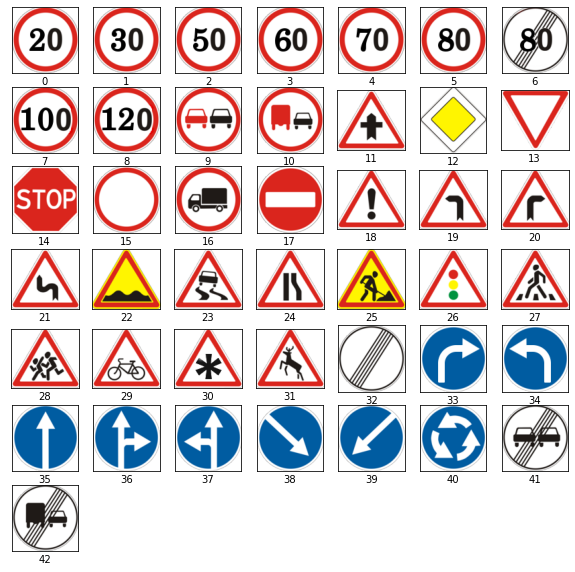

In [5]:
# Show the dataset labels
dir = '..//archive'

plt.figure(figsize=(10, 10))
for i in range (0,43):
    plt.subplot(7,7,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    path = dir + "/meta/{0}.png".format(i)
    img = plt.imread(path)
    plt.imshow(img)
    plt.xlabel(i)
plt.savefig('fig1',dpi=250)

In [6]:
#We need to convert the list into numpy arrays for feeding to the model.
#we use the train_test_split() method to split training and testing data.

In [7]:
print(data.shape, labels.shape)
#Splitting training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
#Converting the labels into one hot encoding
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

(39209, 64, 64, 3) (39209,)
(31367, 64, 64, 3) (7842, 64, 64, 3) (31367,) (7842,)


In [8]:
#The shape of data is (39209, 64, 64, 3) which means that there are 39,209 images of size 64×64 pixels and the last 3 means 
#the data contains colored images (RGB value).

### Build a CNN models

In [18]:
#To classify the images into their respective categories, we will build a CNN model (Convolutional Neural Network)
#We compile the model with Adam optimizer which performs well and loss is 
#“categorical_crossentropy” because we have multiple classes to categorise.

#A Sequential model is appropriate for a plain stack of layers where each layer has exactly 
#one input tensor and one output tensor.

In [19]:
#Building the model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))
#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#### Train and validate the model

In [20]:
#After building the model architecture, we then train the model using model.fit().
#We tried with batch size 32 and 64. Our model performed better with 64 batch size. And after 15 epochs the accuracy was stable.

In [21]:
epochs = 15
history = model.fit(X_train, y_train, batch_size=64, epochs=epochs, validation_data=(X_test, y_test))
model.save("my_model.h5")

Epoch 1/15
491/491 [==============================] - 377s 766ms/step - loss: 1.9876 - accuracy: 0.5782 - val_loss: 0.2590 - val_accuracy: 0.9431
Epoch 2/15
491/491 [==============================] - 372s 758ms/step - loss: 0.4358 - accuracy: 0.8760 - val_loss: 0.1052 - val_accuracy: 0.9718
Epoch 3/15
491/491 [==============================] - 394s 803ms/step - loss: 0.2796 - accuracy: 0.9204 - val_loss: 0.0785 - val_accuracy: 0.9799
Epoch 4/15
491/491 [==============================] - 361s 735ms/step - loss: 0.2185 - accuracy: 0.9364 - val_loss: 0.0504 - val_accuracy: 0.9875
Epoch 5/15
491/491 [==============================] - 368s 750ms/step - loss: 0.1749 - accuracy: 0.9488 - val_loss: 0.0457 - val_accuracy: 0.9875
Epoch 6/15
491/491 [==============================] - 279s 568ms/step - loss: 0.1495 - accuracy: 0.9569 - val_loss: 0.0519 - val_accuracy: 0.9861
Epoch 7/15
491/491 [==============================] - 283s 577ms/step - loss: 0.1480 - accuracy: 0.9582 - val_loss: 0.0379 -

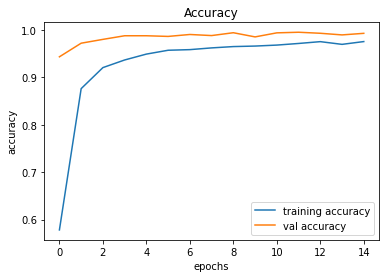

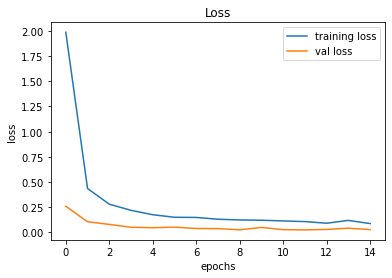

In [22]:
#plotting graphs for accuracy and the loss.
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()


#### Test our model with test dataset

In [23]:
#We extract the image path and labels using pandas. Then to predict the model,
#we have to resize our images to 64×64 pixels and make a numpy array containing all image data.

In [24]:
#testing accuracy on test dataset
from sklearn.metrics import accuracy_score
y_test = pd.read_csv('Test.csv')
labels = y_test["ClassId"].values
imgs = y_test["Path"].values
data=[]
for img in imgs:
    image = Image.open(img)
    image = image.resize((64,64))
    data.append(np.array(image))
X_test=np.array(data)
pred = model.predict(X_test).argmax(axis=1)

#Accuracy with the test data
from sklearn.metrics import accuracy_score
print(accuracy_score(labels, pred))

0.9723673792557403


In [25]:
#save the model that we have trained.
model.save('traffic_classifier.h5')

#### VGG16 model

In [35]:
image_data = []
image_labels = []
total_classes = 43
height = 64
width = 64
channels = 3
cur_path = os.getcwd()

for i in range(total_classes):
    path = os.path.join(cur_path,'train',str(i))
    images = os.listdir(path)
    for img in images:
        try:
            image = cv2.imread(path + '\\'+ img)
            image_fromarray = Image.fromarray(image, 'RGB')
            resize_image = image_fromarray.resize((height, width))
            image_data.append(np.array(resize_image))
            image_labels.append(i)
        except:
            print("Error - Image loading")
            
#Converting lists into numpy arrays
image_data = np.array(image_data)
image_labels = np.array(image_labels)

In [36]:
#shuffling data
shuffle_indexes = np.arange(image_data.shape[0])
np.random.shuffle(shuffle_indexes)
image_data = image_data[shuffle_indexes]
image_labels = image_labels[shuffle_indexes]

In [37]:
#Splitting training and testing dataset
X_train, X_valid, y_train, y_valid = train_test_split(image_data, image_labels, test_size=0.2, random_state=42, shuffle=True)

X_train = X_train/255 
X_valid = X_valid/255

print("X_train.shape", X_train.shape)
print("X_valid.shape", X_valid.shape)
print("y_train.shape", y_train.shape)
print("y_valid.shape", y_valid.shape)

X_train.shape (31367, 64, 64, 3)
X_valid.shape (7842, 64, 64, 3)
y_train.shape (31367,)
y_valid.shape (7842,)


In [38]:
from keras.utils import np_utils

In [39]:
from tensorflow import keras

In [40]:
#Converting the labels into one hot encoding
y_train = keras.utils.to_categorical(y_train, total_classes)
y_valid = keras.utils.to_categorical(y_valid, total_classes)

print(y_train.shape)
print(y_valid.shape)

(31367, 43)
(7842, 43)


In [41]:
vgg16 = VGG16(input_shape=(64,64,3), weights='imagenet', include_top=False)

In [42]:
# don't train existing weights
for layer in vgg16.layers:
    layer.trainable = False

In [43]:
#add_model = Sequential()
add_model.add(Flatten(input_shape=vgg16.output_shape[1:]))
add_model.add(Dense(1024, activation='relu'))
add_model.add(Dense(y_train.shape[1], activation='softmax'))

model = Model(inputs=vgg16.input, outputs=add_model(vgg16.output))
learning_rate = 0.0001
def results(model):
  adam = Adam(lr=learning_rate)

# tell the model what cost and optimization method to use
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history2 =model.fit(X_train, y_train, batch_size=128, epochs=14,validation_data=(X_valid, y_valid))
model.summary()


Epoch 1/14
246/246 [==============================] - 582s 2s/step - loss: 1.2415 - accuracy: 0.6313 - val_loss: 0.8555 - val_accuracy: 0.7271
Epoch 2/14
246/246 [==============================] - 562s 2s/step - loss: 0.5724 - accuracy: 0.8301 - val_loss: 0.5299 - val_accuracy: 0.8479
Epoch 3/14
246/246 [==============================] - 594s 2s/step - loss: 0.3849 - accuracy: 0.8870 - val_loss: 0.4236 - val_accuracy: 0.8638
Epoch 4/14
246/246 [==============================] - 681s 3s/step - loss: 0.2751 - accuracy: 0.9191 - val_loss: 0.3332 - val_accuracy: 0.8931
Epoch 5/14
246/246 [==============================] - 1046s 4s/step - loss: 0.2219 - accuracy: 0.9326 - val_loss: 0.3135 - val_accuracy: 0.9045
Epoch 6/14
246/246 [==============================] - 825s 3s/step - loss: 0.1704 - accuracy: 0.9507 - val_loss: 0.2962 - val_accuracy: 0.9081
Epoch 7/14
246/246 [==============================] - 721s 3s/step - loss: 0.1514 - accuracy: 0.9555 - val_loss: 0.2920 - val_accuracy: 0.909

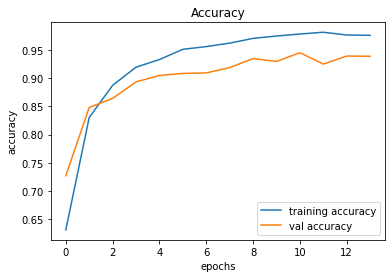

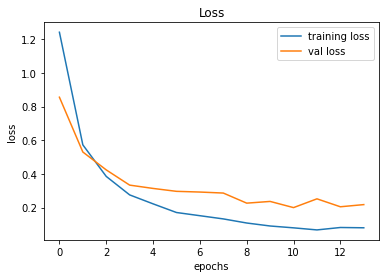

In [46]:
#plotting graphs for accuracy and the loss.
plt.figure(0)
plt.plot(history2.history['accuracy'], label='training accuracy')
plt.plot(history2.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.figure(1)
plt.plot(history2.history['loss'], label='training loss')
plt.plot(history2.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()


#### Test our model with test dataset

In [111]:
#testing accuracy on test dataset
import tensorflow as tf
from sklearn.metrics import accuracy_score
from keras.applications.vgg16 import preprocess_input 
from keras.preprocessing.image import img_to_array

input_path = '..//archive'
test = pd.read_csv(input_path + '/Test.csv')

labels1 = test["ClassId"].values
test_imgs = test["Path"].values
data=[]
for img in test_imgs:
    image = Image.open(img)
    image = image.resize((64,64))
    image = img_to_array(image)
    image = np.expand_dims(image, axis=0)
    image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
    data.append(np.array(image))
X_test1=np.array(data)
pred2 = add_model.predict(X_test1).argmax(axis=1)

#Accuracy with the test data
from sklearn.metrics import accuracy_score
print(accuracy_score(labels, pred2))


In [ ]:
#save the model that we have trained.
model.save('traffic_classifier2')